In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Load the features
features = pd.read_csv(r'D:/College/Semester 5/ES335 Ml/ES335_Andrew_NG/HAR/UCI HAR Dataset/features.txt', delim_whitespace=True, header=None)

feature_names = features[1].values  # Extract the feature names

# Load the training data
X_train = pd.read_csv(r'D:\College\Semester 5\ES335 Ml\ES335_Andrew_NG\HAR\UCI HAR Dataset\train\X_train.txt', delim_whitespace=True, header=None)
X_train.columns = feature_names  # Assign feature names to columns

# Load the labels
y_train = pd.read_csv(r'D:\College\Semester 5\ES335 Ml\ES335_Andrew_NG\HAR\UCI HAR Dataset\train\y_train.txt', delim_whitespace=True, header=None)
y_train.columns = ['Activity']  # Give a meaningful name to the column

# print(X_train)

print(X_train.columns)


Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=561)


In [2]:
# a) remains

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)


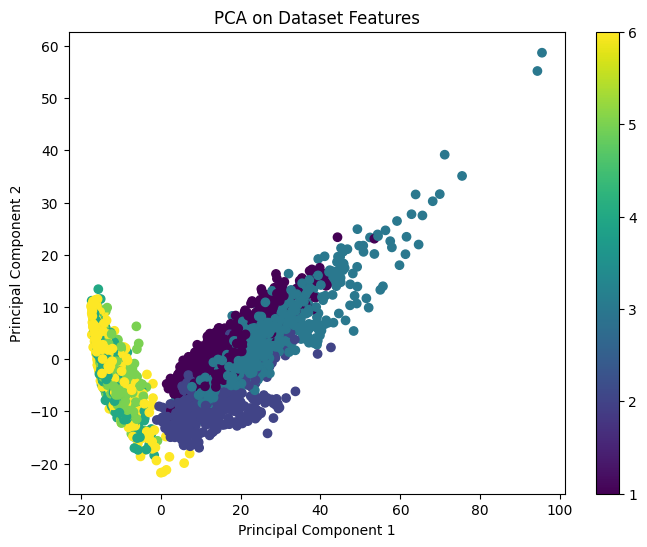

In [6]:
# Apply PCA
dataset_pca = PCA(n_components=2)
dataset_pca_results = dataset_pca.fit_transform(X_train_scaled)

# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(dataset_pca_results[:, 0], dataset_pca_results[:, 1], c=y_train['Activity'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Dataset Features')
plt.colorbar()
plt.show()


In [5]:
import pandas as pd
import numpy as np
import tsfel
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [12]:
import tsfel
import numpy as np
import pandas as pd

cfg = tsfel.get_features_by_domain()
X_train_extracted = []

# Loop over each time series in X_train
for i in range(len(X_train)):
    # If X_train is a DataFrame and each row represents a time series
    time_series = X_train.iloc[i]  # Use iloc for integer-based indexing
    
    # Extract features for the current time series
    features = tsfel.time_series_features_extractor(cfg, pd.DataFrame(time_series), fs=50, window_size=250)
    
    # Convert features to numpy array and append to the list
    X_train_extracted.append(features.values)

# Convert the list to a NumPy array
X_train_extracted = np.array(X_train_extracted)

# Reshape the array to make it 2D (samples, features)
X_train_extracted = X_train_extracted.reshape(X_train_extracted.shape[0], -1)

print(f"Shape of extracted features matrix on train set: {X_train_extracted.shape}")


KeyboardInterrupt: 

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_extracted_pca = pca.fit_transform(X_train_extracted)

# # Similarly
# X_val_extracted_pca = PCA.transform(X_val_extracted)
# X_test_extracted_pca = PCA.transform(X_test_extracted)

# Plotting scatter plot
plt.scatter(X_train_extracted_pca[:,0],X_train_extracted_pca[:,1],c=y_train)
plt.xlabel("First component")
plt.ylabel("Second component")
plt.title("Scatter plot for dimentionally reduced extracted features on train set")
plt.colorbar()
plt.show()

TypeError: fit_transform() missing 1 required positional argument: 'X'